In [14]:
from graph_traffic.config import training_path, results_path
import pandas as pd
from graph_traffic.model_selection import get_node_ids
import matplotlib.pyplot as plt

ids_list = get_node_ids()
#########################
# A: Long-time forecast #
#########################
long_term = dict()
# A1. baseline
# A1.1 mean
long_term["mean"] = dict()
long_term["mean"]["maes"] = pd.read_csv(f"{training_path}/baseline/mean_regressor/mean_maes.csv", index_col=0)
long_term["mean"]["mses"] = pd.read_csv(f"{training_path}/baseline/mean_regressor/mean_mses.csv", index_col=0)
# A1.2 median
long_term["median"] = dict()
long_term["median"]["maes"] = pd.read_csv(f"{training_path}/baseline/median_regressor/median_maes.csv", index_col=0)
long_term["median"]["mses"] = pd.read_csv(f"{training_path}/baseline/median_regressor/median_mses.csv", index_col=0)
# A1.3 daytime mean
long_term["daytime_mean"] = dict()
long_term["daytime_mean"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_mean/daytime-maes.csv", index_col=0)
long_term["daytime_mean"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_mean/daytime-mses.csv", index_col=0)
# A1.4 daytime mean with working day
long_term["daytime_mean_ww"] = dict()
long_term["daytime_mean_ww"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_mean_with_workingday/daytime-maes.csv", index_col=0)
long_term["daytime_mean_ww"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_mean_with_workingday/daytime-mses.csv", index_col=0)
# A1.5 daytime mean
long_term["daytime_median"] = dict()
long_term["daytime_median"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_median/daytime-maes.csv", index_col=0)
long_term["daytime_median"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_median/daytime-mses.csv", index_col=0)
# A1.6 daytime mean with working day
long_term["daytime_median_ww"] = dict()
long_term["daytime_median_ww"]["maes"] = pd.read_csv(f"{training_path}/baseline/daytime_median_with_workingday/daytime-maes.csv", index_col=0)
long_term["daytime_median_ww"]["mses"] = pd.read_csv(f"{training_path}/baseline/daytime_median_with_workingday/daytime-mses.csv", index_col=0)
# A2. linear regression
# A2.1 first linear regression
long_term["lin-reg1"] = dict()
long_term["lin-reg1"]["maes"] = pd.read_csv(f"{training_path}/regression/final/first/maes_per_sensor-reg1.csv", index_col=0)
long_term["lin-reg1"]["mses"] = pd.read_csv(f"{training_path}/regression/final/first/mses_per_sensor-reg1.csv", index_col=0)
# A2.2 second linear regression
long_term["lin-reg2"] = dict()
long_term["lin-reg2"]["maes"] = pd.read_csv(f"{training_path}/regression/final/second/maes_per_sensor-reg2.csv", index_col=0)
long_term["lin-reg2"]["mses"] = pd.read_csv(f"{training_path}/regression/final/second/mses_per_sensor-reg2.csv", index_col=0)
# A3. XGBoost regressor
long_term["xgboost"] = dict()
long_term["xgboost"]["maes"] = pd.read_csv(f"{training_path}/xgboost/xgb_maes.csv", index_col=0)
long_term["xgboost"]["mses"] = pd.read_csv(f"{training_path}/xgboost/xgb_mses.csv", index_col=0)

##########################
# B: Short-time forecast #
##########################
short_term = dict()
# B1 Baseline
# B1.1 repeat complete
short_term["repeat"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["repeat"][seq_len] = dict()
        short_term["repeat"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/repeat/repeat-maes_{seq_len}.csv", index_col=0)
        short_term["repeat"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/repeat/repeat-mses_{seq_len}.csv", index_col=0)
# B1.2 repeat last
short_term["repeat_last"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["repeat_last"][seq_len] = dict()
        short_term["repeat_last"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/repeat_last/repeat-last-maes_{seq_len}.csv", index_col=0)
        short_term["repeat_last"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/repeat_last/repeat-last-mses_{seq_len}.csv", index_col=0)
# B1.3 drift regressor
short_term["drift"] = dict()
for seq_len in [2, 4, 8, 16]:
        short_term["drift"][seq_len] = dict()
        short_term["drift"][seq_len]["maes"] = pd.read_csv(f"{training_path}/baseline/drift/drift-maes_{seq_len}.csv", index_col=0)
        short_term["drift"][seq_len]["mses"] = pd.read_csv(f"{training_path}/baseline/drift/drift-mses_{seq_len}.csv", index_col=0)
# B.2 GNN
for config in range(1, 6):
        short_term[f"gnn_config{config}"] = dict()
        short_term[f"gnn_config{config}"][config] = dict()
        for seq_len in [2, 4, 8, 16]:
                short_term[f"gnn_config{config}"][seq_len] = dict()
                short_term[f"gnn_config{config}"][seq_len]["maes"] = pd.read_csv(f"{training_path}/gnn/config{config}/maes_{seq_len}.csv", index_col=0)
                short_term[f"gnn_config{config}"][seq_len]["mses"] = pd.read_csv(f"{training_path}/gnn/config{config}/mses_{seq_len}.csv", index_col=0)

# Results of long term

In [15]:
long_term_maes_avg = dict()
long_term_mses_avg = dict()
for model_name, loss_dict in long_term.items():
        maes = loss_dict["maes"]
        mses = loss_dict["mses"]
        long_term_maes_avg[model_name] = maes["avg"]
        long_term_mses_avg[model_name] = mses["avg"]


long_term_maes_avg = pd.DataFrame(long_term_maes_avg)
long_term_maes_avg["best_model"] = long_term_maes_avg.idxmin(axis=1)
long_term_maes_avg.to_csv(f"{results_path}/long-term/long-term-MAE.csv")

long_term_mses_avg = pd.DataFrame(long_term_mses_avg)
long_term_mses_avg["best_model"] = long_term_mses_avg.idxmin(axis=1)
long_term_mses_avg.to_csv(f"{results_path}/long-term/long-term-MSE.csv")

In [16]:
best_models = pd.DataFrame([], index=long_term_maes_avg.columns, columns=["Mejor modelo según MAE", "Mejor modelo según MSE"])
best_models["Mejor modelo según MAE"] = long_term_maes_avg.best_model.value_counts()
best_models["Mejor modelo según MSE"] = long_term_mses_avg.best_model.value_counts()
best_models.fillna(0).astype(int)

,Mejor modelo según MAE,Mejor modelo según MSE
mean,0,0
median,0,0
daytime_mean,0,1
daytime_mean_ww,3,13
daytime_median,0,0
daytime_median_ww,20,6
lin-reg1,0,1
lin-reg2,0,1
xgboost,14,15
best_model,0,0


# Results of short term

In [18]:
for seq_len in [2, 4, 8, 16]:
        short_term_maes_avg = dict()
        short_term_mses_avg = dict()
        for model_name, loss_dict in short_term.items():
                loss_dict = loss_dict[seq_len]
                maes = loss_dict["maes"]
                mses = loss_dict["mses"]
                short_term_maes_avg[model_name] = maes["avg"]
                short_term_mses_avg[model_name] = mses["avg"]
        short_term_maes_avg = pd.DataFrame(short_term_maes_avg)
        short_term_maes_avg["best_model"] = short_term_maes_avg.idxmin(axis=1)
        short_term_maes_avg.to_csv(f"{results_path}/short-term/{seq_len}-periods/MAE.csv")
        short_term_mses_avg = pd.DataFrame(short_term_mses_avg)
        short_term_mses_avg["best_model"] = short_term_mses_avg.idxmin(axis=1)
        short_term_mses_avg.to_csv(f"{results_path}/short-term/{seq_len}-periods/MSE.csv")

In [ ]:
short_term_maes_avg.best_model.value_counts()

In [ ]:
pd.DataFrame(short_term_mses_avg)

In [ ]:
def plot_losses(group, loss):
        fig, ax = plt.subplots(len(ids_list), 1, figsize=(10, len(ids_list)), sharex=True)
        if loss == "mae":
                dict_loss = maes
        else:
                dict_loss = mses
        for i, sensor_id in enumerate(ids_list):
                ax[i].set_ylabel(sensor_id)
                for label, df in dict_loss.items():
                        if label not in group:
                                continue
                        df.loc[sensor_id][:-2].hist(ax=ax[i], alpha=0.8, label=label)
        fig.tight_layout()
        plt.legend()
        plt.show()

In [ ]:
plot_losses(linear_regression_models+xgboost, "mae")

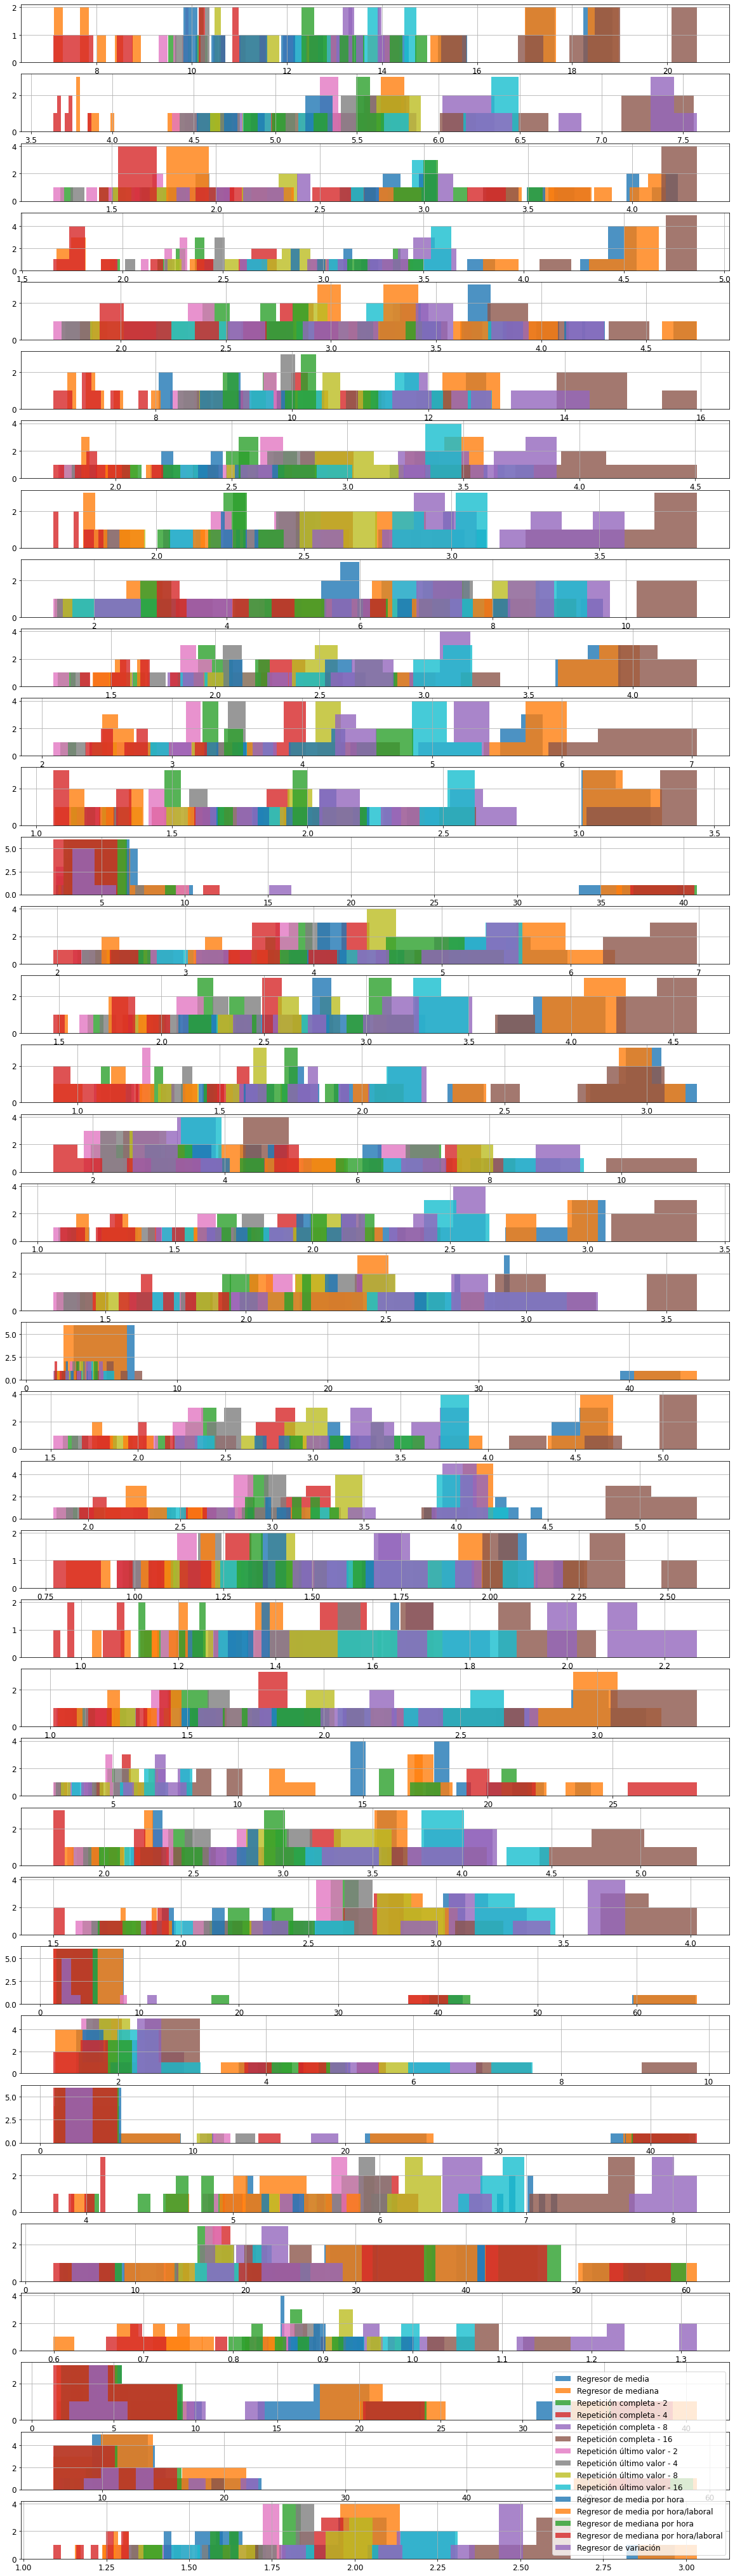

In [55]:
plot_losses(baseline_models, "mae")